In [1]:
# Load libraries
import pandas as pd
import io
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from google.colab import files
uploaded = files.upload()

Saving marks2.csv to marks2.csv


In [6]:
#names = ['math', 'science', 'marks']
dataset = pd.read_csv(io.BytesIO(uploaded['marks2.csv']))
dataset = dataset.drop([])

print(dataset.shape)

(4000, 3)


In [7]:
# head
print(dataset.head(20))

    math  science  status
0     79       76       1
1     86       68       1
2     77       68       1
3     93       51       1
4     95       51       1
5     76       88       1
6     72       62       1
7     83       97       1
8     97       84       1
9     71       97       1
10    81       67       1
11    90      100       1
12    95       83       1
13    80       74       1
14    73       61       1
15    84       97       1
16    72       65       1
17    80       91       1
18    95       95       1
19    72       97       1


In [8]:
# descriptions
print(dataset.describe())

              math      science       status
count  4000.000000  4000.000000  4000.000000
mean     60.131500    49.747000     0.500000
std      29.123011    28.761594     0.500063
min       1.000000     1.000000     0.000000
25%      35.000000    25.000000     0.000000
50%      69.500000    49.500000     0.500000
75%      85.000000    75.000000     1.000000
max     100.000000   100.000000     1.000000


In [10]:
# class distribution
print(dataset.groupby('status').size())

status
0    2000
1    2000
dtype: int64


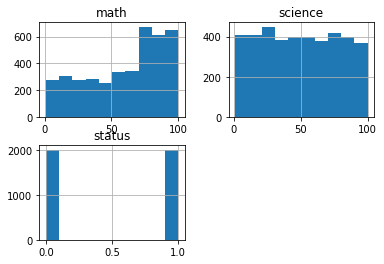

In [11]:
# histograms
dataset.hist()
plt.show()

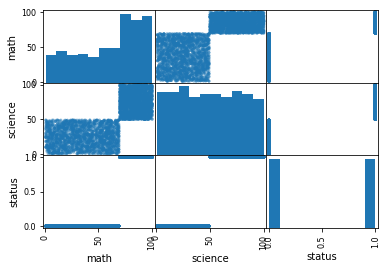

In [12]:

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [14]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:2]
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_validation)
print (len(X_validation))

[[44 19]
 [77 88]
 [86 83]
 ...
 [61 15]
 [98 78]
 [73 51]]
800


In [15]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.997187 (0.002187)
LDA: 0.995313 (0.003494)
KNN: 0.999375 (0.001250)
CART: 1.000000 (0.000000)
NB: 0.998750 (0.002073)
SVM: 0.999375 (0.001250)


In [16]:
# Make predictions by KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print('KNN')
print("Accuracy score : %s" % accuracy_score(Y_validation, predictions))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

#for i in range(len(X_validation)):
  #print("%s : %s      : (%s)" % (X_validation[i], Y_validation[i], predictions[i]))
  
  
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("%s : %s      : (%s)" % (X_validation[j], Y_validation[j], predictions[j]))
   

KNN
Accuracy score : 1.0
Confusion Matrix 
[[397   0]
 [  0 403]]
Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       403

   micro avg       1.00      1.00      1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [18]:
# Make prediction using LR

lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print('Logistic Regression')
print("Accuracy score : %s" % accuracy_score(Y_validation, predictions))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

#for i in range(len(X_validation)):
  #print("%s : %s      : (%s)" % (X_validation[i], Y_validation[i], predictions[i]))
  
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("%s : %s      : (%s)" % (X_validation[j], Y_validation[j], predictions[j]))

Logistic Regression
Accuracy score : 0.99625
Confusion Matrix 
[[394   3]
 [  0 403]]
Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       397
           1       0.99      1.00      1.00       403

   micro avg       1.00      1.00      1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

[66 48] : 0      : (1)
[68 49] : 0      : (1)
[68 48] : 0      : (1)


In [19]:
# Make predictions by LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print('LDA')
print("Accuracy score : %s" % accuracy_score(Y_validation, predictions))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

#for i in range(len(X_validation)):
  #print("%s : %s      : (%s)" % (X_validation[i], Y_validation[i], predictions[i]))
  
  
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("%s : %s      : (%s)" % (X_validation[j], Y_validation[j], predictions[j]))
  

LDA
Accuracy score : 0.99625
Confusion Matrix 
[[394   3]
 [  0 403]]
Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       397
           1       0.99      1.00      1.00       403

   micro avg       1.00      1.00      1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

[66 48] : 0      : (1)
[68 49] : 0      : (1)
[68 48] : 0      : (1)


In [20]:
# Make predictions by Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
predictions = dt.predict(X_validation)

print('Decision Tree')
print("Accuracy score : %s" % accuracy_score(Y_validation, predictions))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

#for i in range(len(X_validation)):
  #print("%s : %s      : (%s)" % (X_validation[i], Y_validation[i], predictions[i]))
  
  
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("%s : %s      : (%s)" % (X_validation[j], Y_validation[j], predictions[j]))
  

Decision Tree
Accuracy score : 1.0
Confusion Matrix 
[[397   0]
 [  0 403]]
Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       403

   micro avg       1.00      1.00      1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [21]:
# Make predictions by Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)

print('Gaussian Naive Bayes')
print("Accuracy score : %s" % accuracy_score(Y_validation, predictions))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

#for i in range(len(X_validation)):
  #print("%s : %s      : (%s)" % (X_validation[i], Y_validation[i], predictions[i]))
  
  
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("%s : %s      : (%s)" % (X_validation[j], Y_validation[j], predictions[j]))
  

Gaussian Naive Bayes
Accuracy score : 0.99875
Confusion Matrix 
[[396   1]
 [  0 403]]
Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       403

   micro avg       1.00      1.00      1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

[68 49] : 0      : (1)


In [22]:
# Make predictions by SVM
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print('SVM')
print("Accuracy score : %s" % accuracy_score(Y_validation, predictions))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

#for i in range(len(X_validation)):
  #print("%s : %s      : (%s)" % (X_validation[i], Y_validation[i], predictions[i]))
  
  
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("%s : %s      : (%s)" % (X_validation[j], Y_validation[j], predictions[j]))
  

SVM
Accuracy score : 1.0
Confusion Matrix 
[[397   0]
 [  0 403]]
Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       403

   micro avg       1.00      1.00      1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

